In [3]:
#All files analysed in external script

import pandas as pd
import seaborn as sns

df = pd.read_csv(r"F:\BactUnet\bacteria_count_bactunet_V4.csv")
print(df.head())
#small hard-coded error in analysis script BactUnet V3 should be V4 3frame (from the single vs 3frame comarison)


   frame  count       method condition     experiment bacteria  \
0      1     55  BactUnet_V3       OGM  EXP-20-BT0401       wt   
1      2     60  BactUnet_V3       OGM  EXP-20-BT0401       wt   
2      3     71  BactUnet_V3       OGM  EXP-20-BT0401       wt   
3      4     55  BactUnet_V3       OGM  EXP-20-BT0401       wt   
4      5     58  BactUnet_V3       OGM  EXP-20-BT0401       wt   

                                            filepath  \
0  F:\BactUnet\bactunet_val\OGM\EXP-20-BT0401\wt\...   
1  F:\BactUnet\bactunet_val\OGM\EXP-20-BT0401\wt\...   
2  F:\BactUnet\bactunet_val\OGM\EXP-20-BT0401\wt\...   
3  F:\BactUnet\bactunet_val\OGM\EXP-20-BT0401\wt\...   
4  F:\BactUnet\bactunet_val\OGM\EXP-20-BT0401\wt\...   

                        filename  
0  OGM_1_MMStack_Default.ome.tif  
1  OGM_1_MMStack_Default.ome.tif  
2  OGM_1_MMStack_Default.ome.tif  
3  OGM_1_MMStack_Default.ome.tif  
4  OGM_1_MMStack_Default.ome.tif  


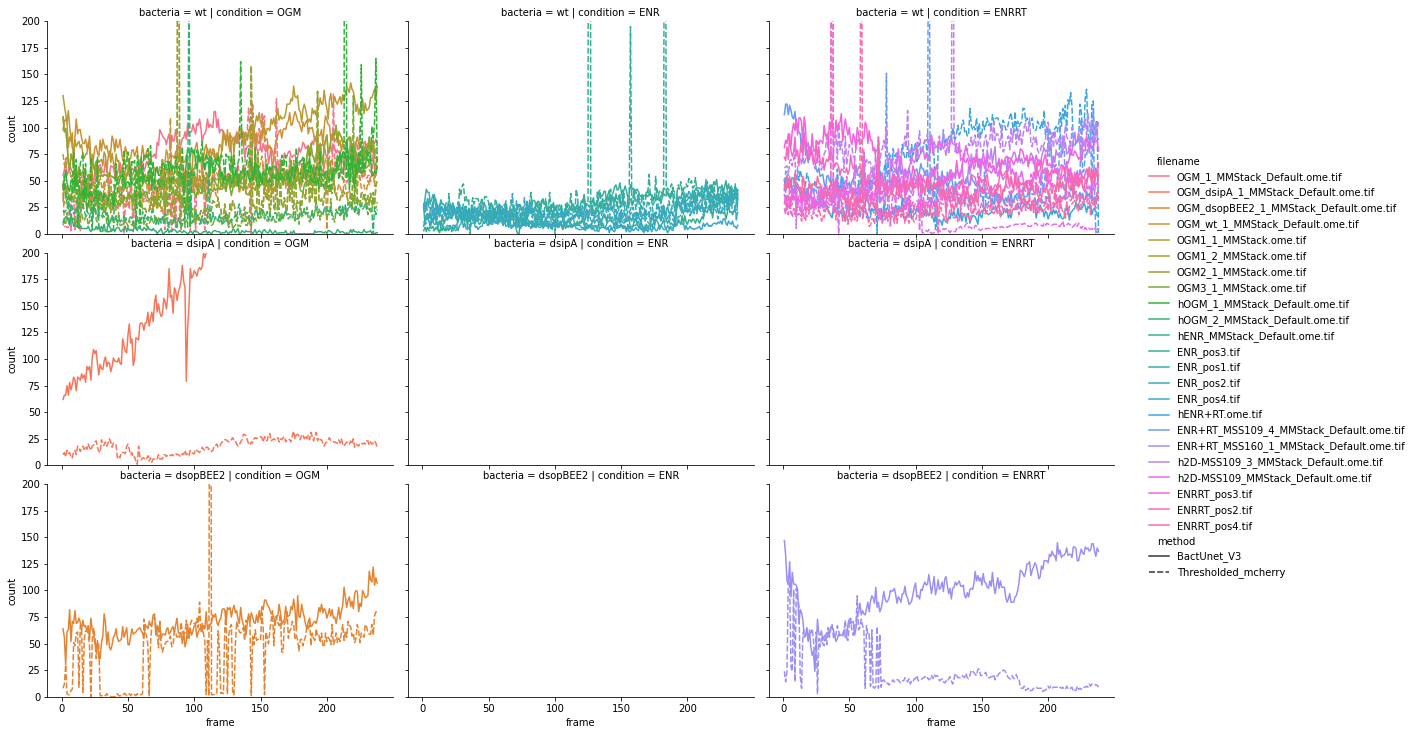

In [5]:
g = sns.relplot(data=df, x='frame', y='count', kind='line', hue='filename', col='condition', row='bacteria', style='method')
g.set(ylim=(0,200))
g.figure.set_size_inches(20, 10)

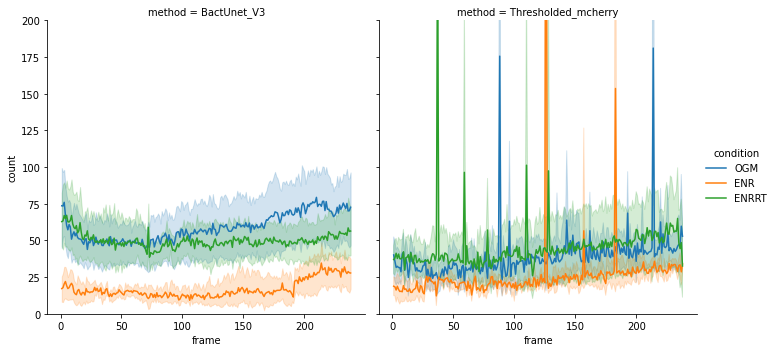

In [6]:
df2 = df[df.bacteria == 'wt']
g1 = sns.relplot(data=df2, x='frame', y='count', kind='line', hue='condition', col='method')
g1.set(ylim=(0,200))

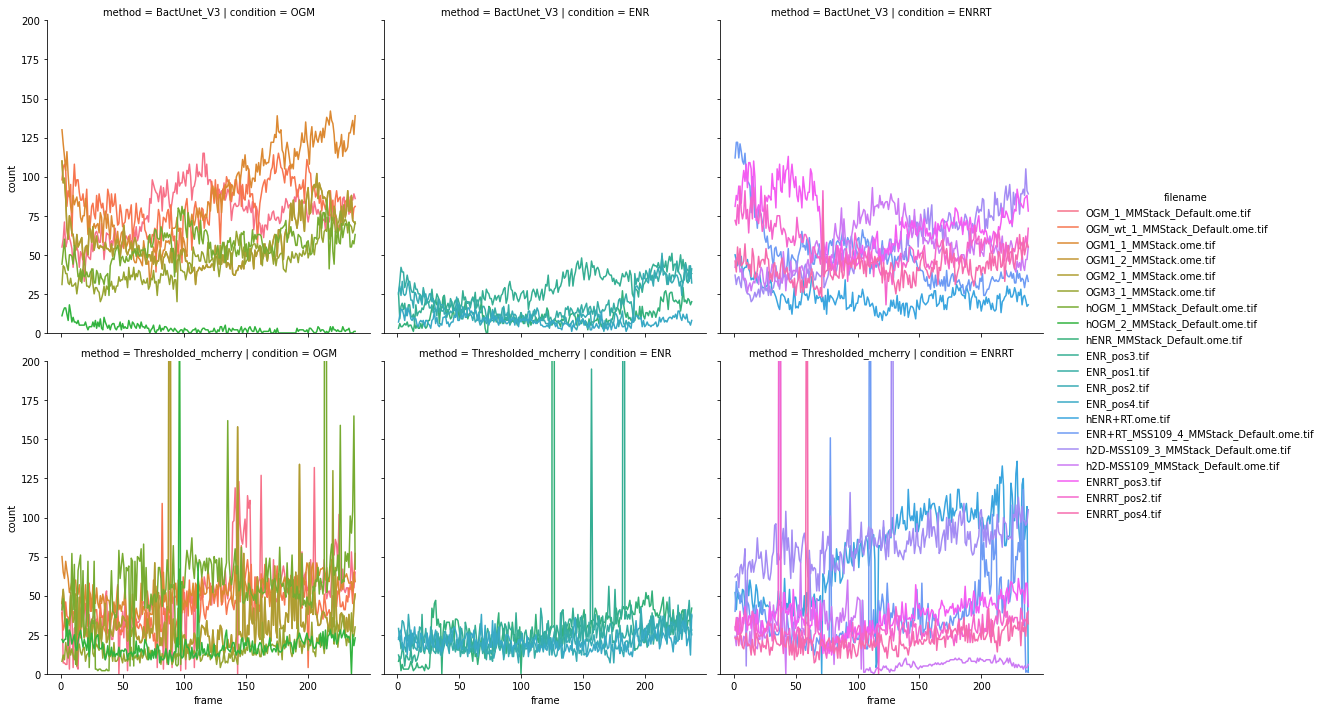

In [7]:
g1 = sns.relplot(data=df2, x='frame', y='count', kind='line', hue='filename', row='method', col='condition')
g1.set(ylim=(0,200))

In [8]:
# filter outlier values differing 7 sigma from 3 closest values to left and right
import numpy as np

def hampel(vals_orig, k=7, t0=3):
    '''
    vals: pandas series of values from which to remove outliers
    k: size of window (including the sample; 7 is equal to 3 on either side of value)
    '''
    #Make copy so original not edited
    vals=vals_orig.copy()    
    #Hampel Filter
    L= 1.4826
    rolling_median=vals.rolling(k).median()
    difference=np.abs(rolling_median-vals)
    median_abs_deviation=difference.rolling(k).median()
    threshold= t0 *L * median_abs_deviation
    outlier_idx=difference>threshold
    vals[outlier_idx]=np.nan
    return(vals)

no_outliers = None
onlywt = df2

for m in onlywt.method.unique():
    sf = onlywt[onlywt['method']==m]
    for fn in onlywt.filename.unique():
        ssf = sf[(sf['filename']==fn)]
        cnts = ssf['count']
        ssf['count_hampel'] = hampel(cnts, 7, 5)
        if no_outliers is None:
            no_outliers = ssf
        no_outliers = pd.concat((no_outliers, ssf), ignore_index=True)

C:\Users\Jens\AppData\Local\Temp\ipykernel_27112\2549008220.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssf['count_hampel'] = hampel(cnts, 7, 5)


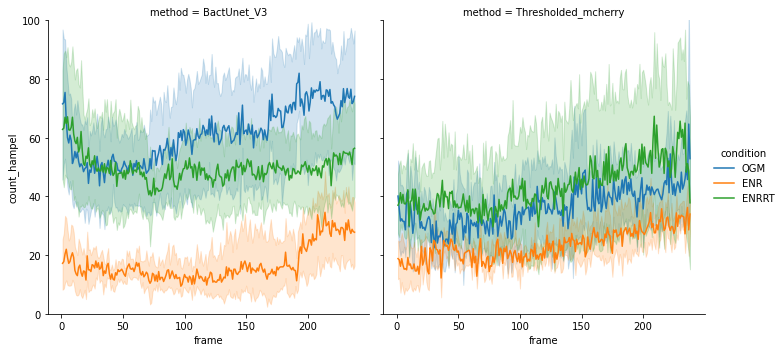

In [9]:
g2 = sns.relplot(data=no_outliers.dropna(), x='frame', y='count_hampel', kind='line', hue='condition', col='method')
g2.set(ylim=(0,100))

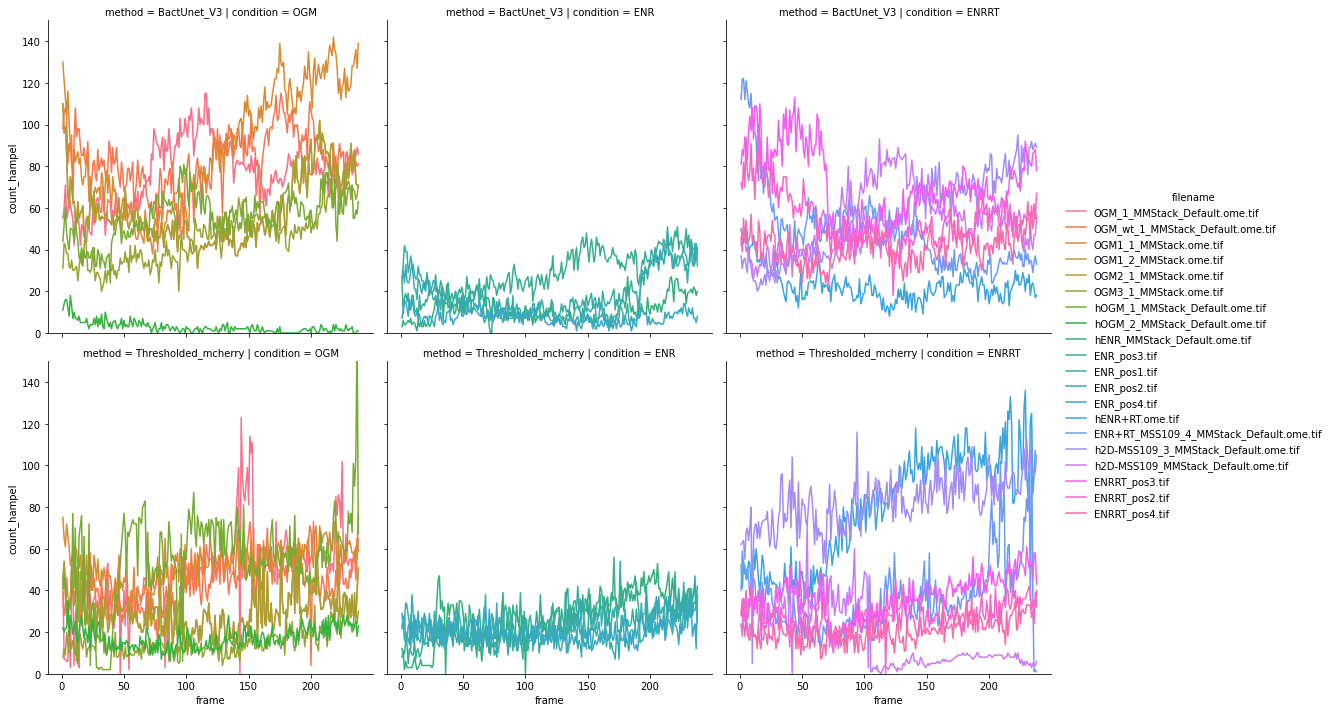

In [11]:
g1 = sns.relplot(data=no_outliers, x='frame', y='count_hampel', kind='line', hue='filename', row='method', col='condition')
g1.set(ylim=(0,150))

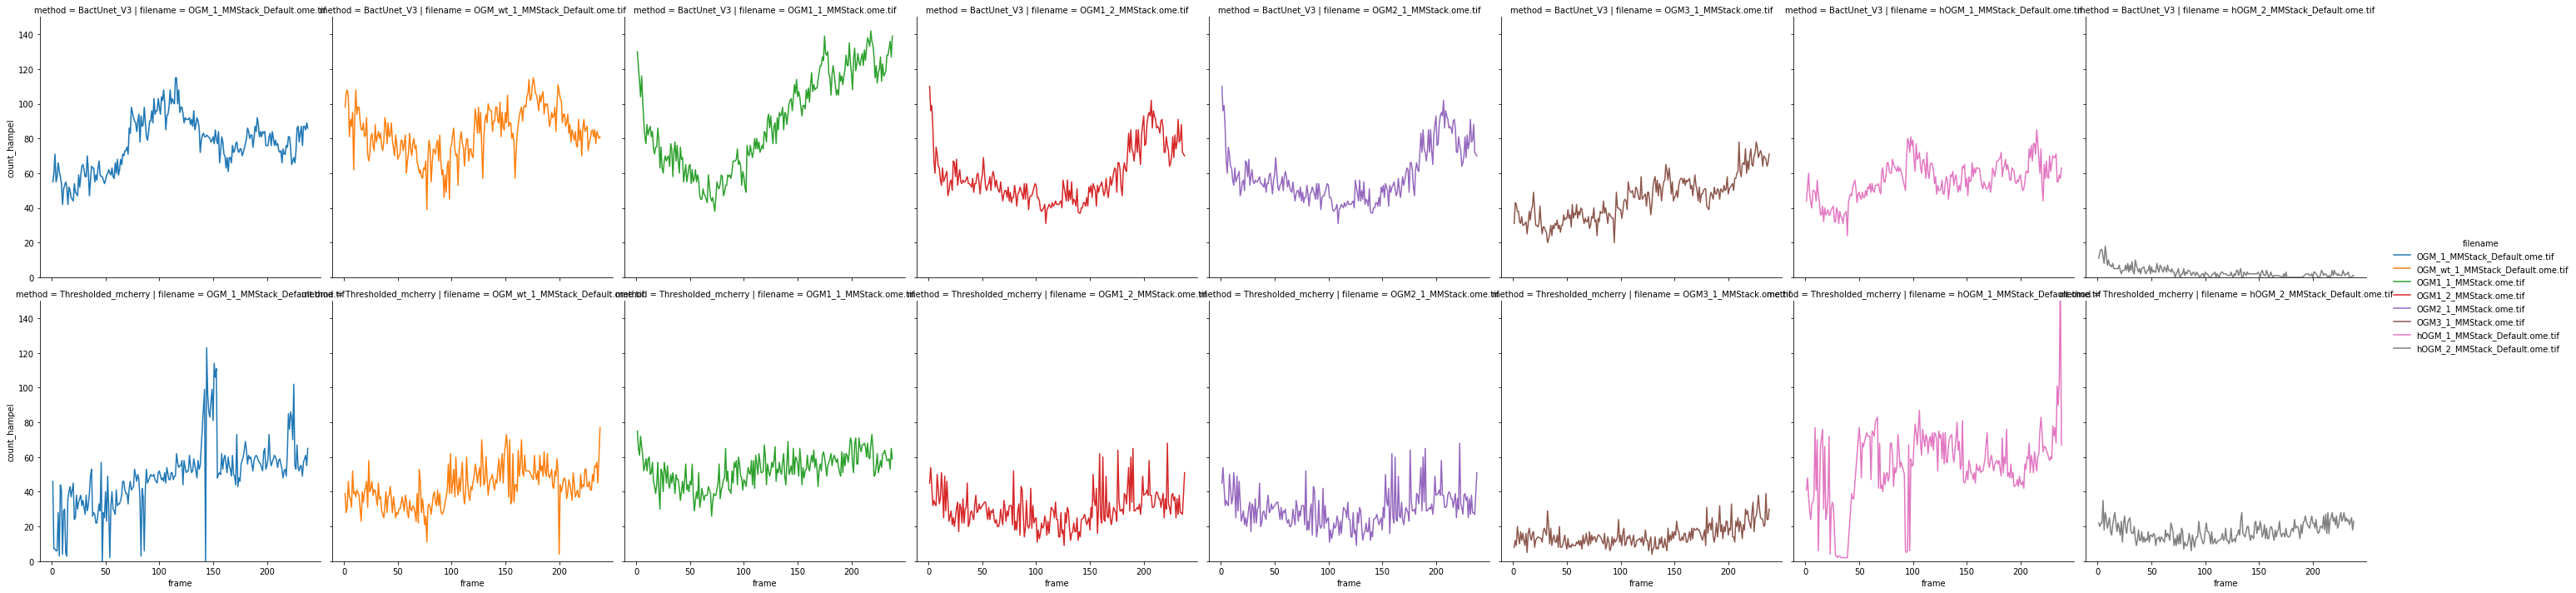

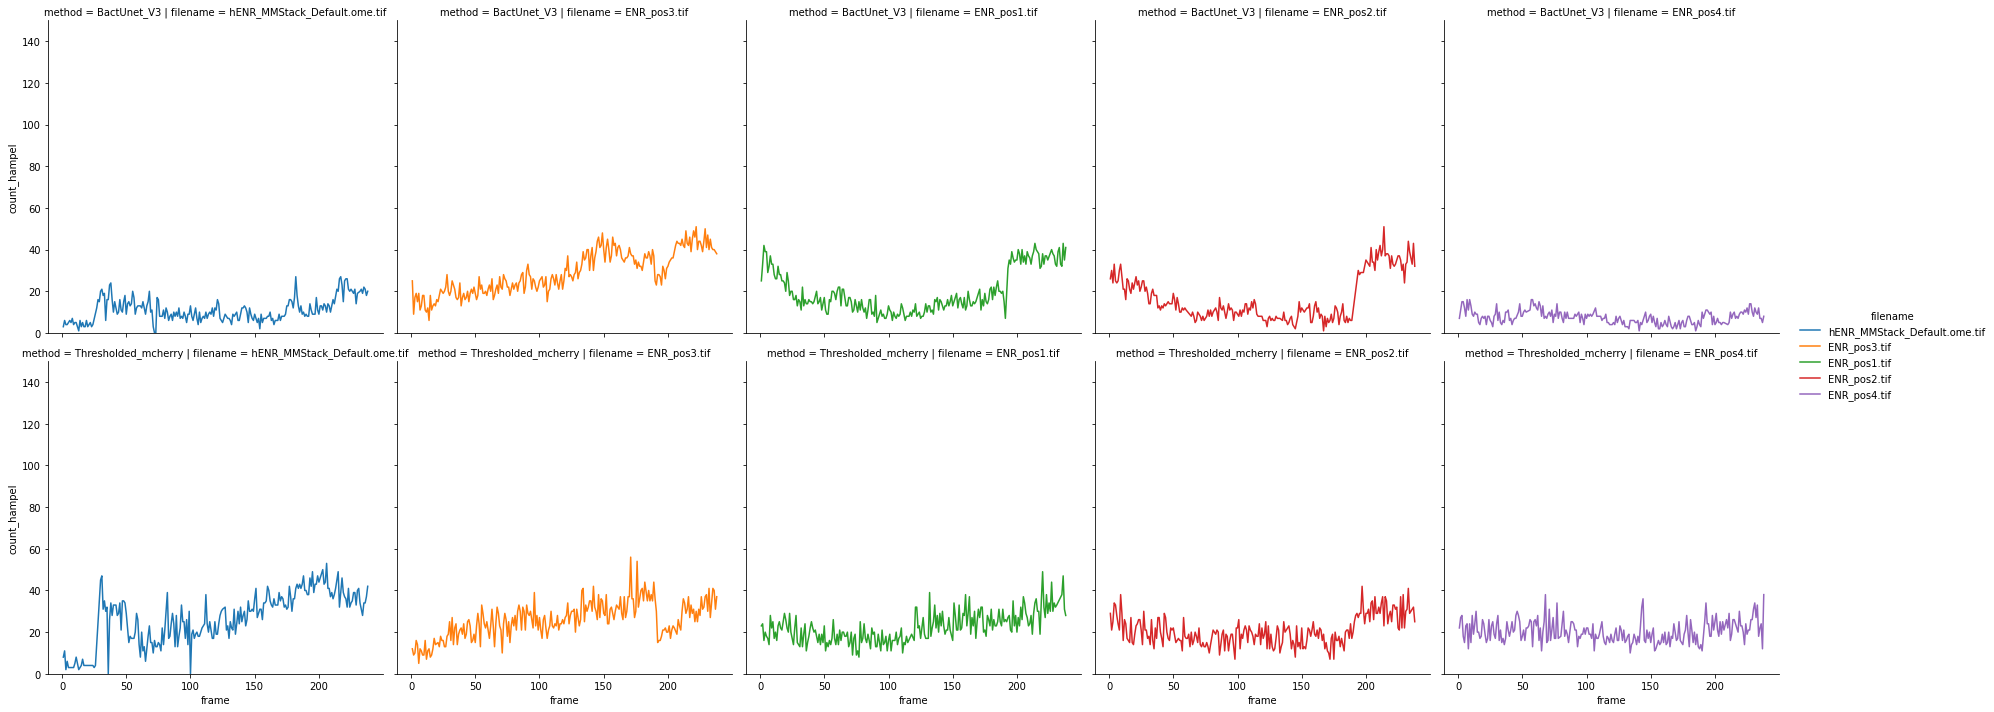

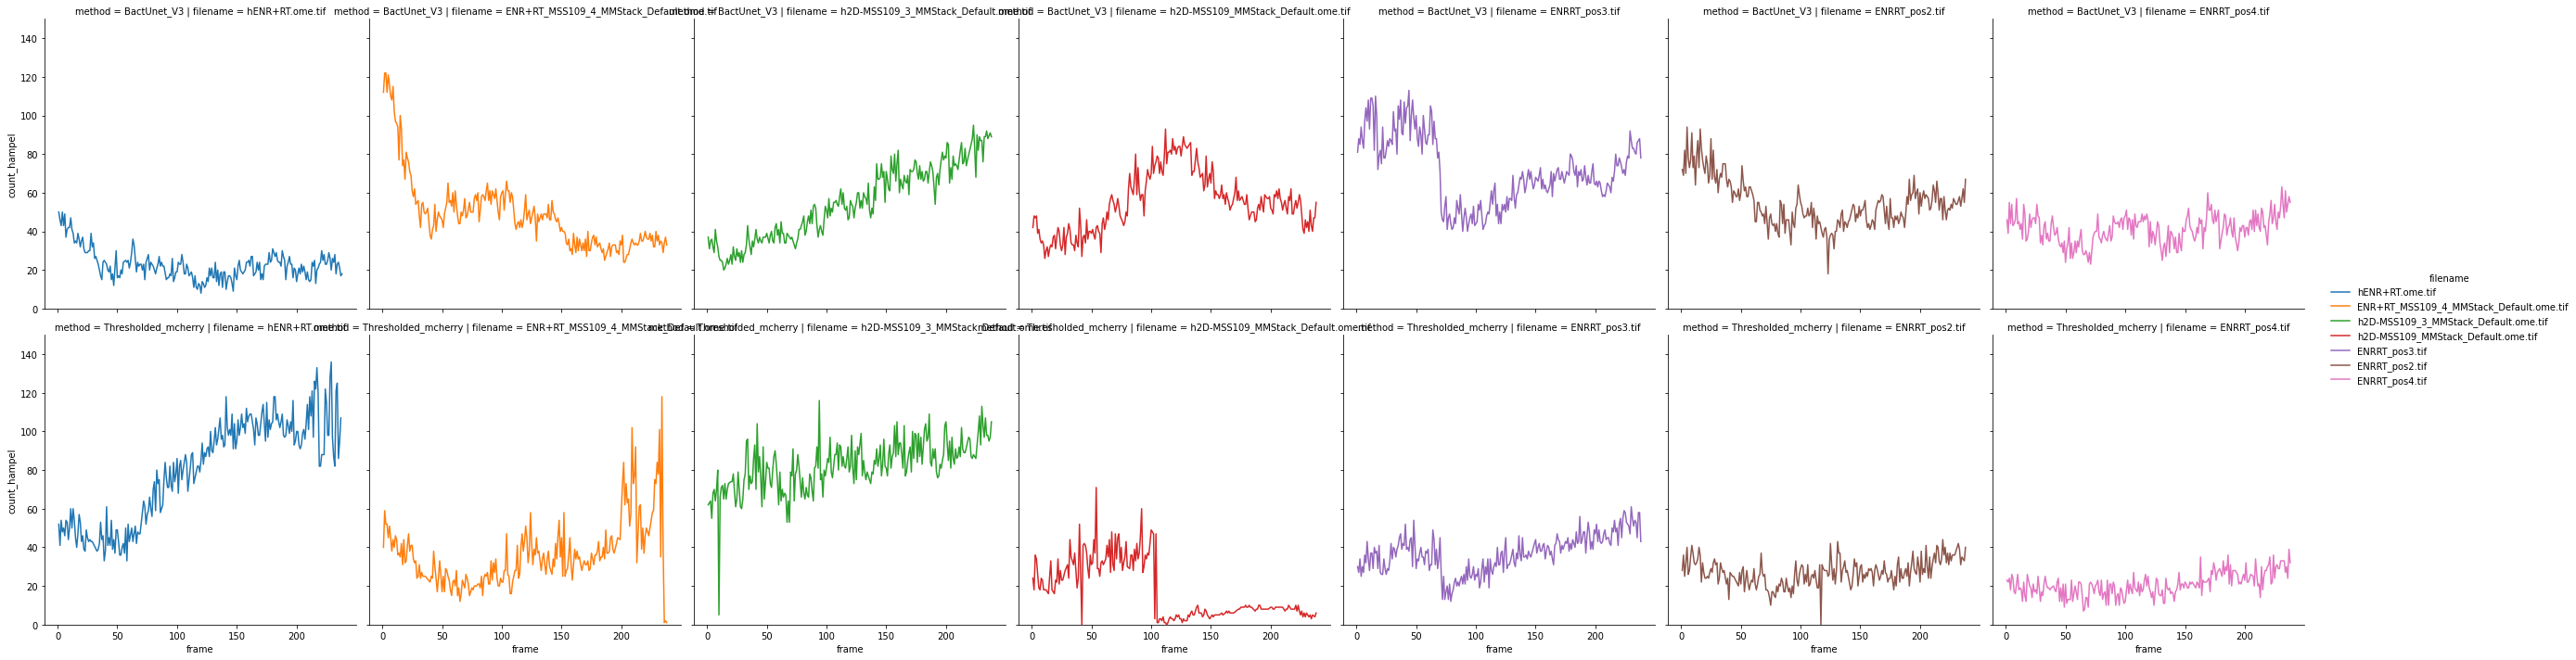

In [17]:
#There is at least one duplicate file in the folder, let's find it.

g3 = sns.relplot(data=no_outliers[no_outliers.condition == 'OGM'], x='frame', y='count_hampel', kind='line', hue='filename', row='method', col='filename')
g3.set(ylim=(0,150))

g2 = sns.relplot(data=no_outliers[no_outliers.condition == 'ENR'], x='frame', y='count_hampel', kind='line', hue='filename', row='method', col='filename')
g2.set(ylim=(0,150))

g1 = sns.relplot(data=no_outliers[no_outliers.condition == 'ENRRT'], x='frame', y='count_hampel', kind='line', hue='filename', row='method', col='filename')
g1.set(ylim=(0,150))

#(it's one OGM file)